In [16]:
import numpy as np 
import pandas as pd
from Levenshtein import distance as lev
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings('ignore')


In [17]:
train = pd.read_csv(r'titanic/train.csv')
test =  pd.read_csv(r'titanic/test.csv')

All = pd.concat([train, test], sort=True).reset_index(drop=True)
All.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [18]:
columns = test.columns
for i in range(len(columns)):
    print(columns[i],'--->',"train:",train[columns[i]].isnull().sum(),
         "|","test:",test[columns[i]].isnull().sum()) 
    
print("Total number of Cabin's missing values is:",All['Cabin'].isnull().sum())


PassengerId ---> train: 0 | test: 0
Pclass ---> train: 0 | test: 0
Name ---> train: 0 | test: 0
Sex ---> train: 0 | test: 0
Age ---> train: 177 | test: 86
SibSp ---> train: 0 | test: 0
Parch ---> train: 0 | test: 0
Ticket ---> train: 0 | test: 0
Fare ---> train: 0 | test: 1
Cabin ---> train: 687 | test: 327
Embarked ---> train: 2 | test: 0
Total number of Cabin's missing values is: 1014


In [19]:
All[All['Fare'].isnull()]
mean_fare = All.groupby(['Pclass', 'Parch', 'SibSp']).Fare.mean()[3][0][0]
All['Fare'] = All['Fare'].fillna(mean_fare)

All[All['Embarked'].isnull()]
All['Embarked'] = All['Embarked'].fillna('S')

In [20]:
All1 = All.copy()
pclass = [1,2,3]
for t in pclass:
    for i in range(All.shape[0]):
        if (All1.Pclass[i]==t)&(pd.isnull(All1["Cabin"][i])== True):
            LD_Ticket={}
            for j in range(All.shape[0]):
                if (All1.Pclass[j]==t)&(pd.isnull(All1["Cabin"][j])== False)&(All1.Fare[j]==All1.Fare[i])&(All1.Embarked[j]==All1.Embarked[i]):
                    LD_Ticket[lev(All1.Ticket[i],All1.Ticket[j])] = j
            if LD_Ticket !={}:
                similar_ticket = LD_Ticket[min(list(LD_Ticket))]
                #print(similar_ticket, LD_Ticket,i)                 #Uncomment this line to see the output, I comment it to make the notebook more clear
                All["Cabin"][i] = All["Cabin"][similar_ticket]
                
All2 = All.copy()
pclass = [1,2,3]
for t in pclass:
    for i in range(All2.shape[0]):
        if (All2.Pclass[i]==t)&(pd.isnull(All2["Cabin"][i])== True):
            LD_Ticket={}
            for j in range(All.shape[0]):
                if (All2.Pclass[j]==t)&(pd.isnull(All2["Cabin"][j])== False)&(abs((All2.Fare[j])- (All2.Fare[i]))<1):
                    LD_Ticket[lev(All2.Ticket[i],All2.Ticket[j])] = j
            if LD_Ticket !={}:
                similar_ticket = LD_Ticket[min(list(LD_Ticket))]
                #print(similar_ticket, LD_Ticket,i)
                All["Cabin"][i] = All["Cabin"][similar_ticket]
                
All3 = All.copy()
pclass = [1,2,3]
for t in pclass:
    for i in range(All3.shape[0]):
        if (All3.Pclass[i]==t)&(pd.isnull(All3["Cabin"][i])== True):
            LD_Ticket={}
            for j in range(All.shape[0]):
                if (All3.Pclass[j]==t)&(pd.isnull(All3["Cabin"][j])== False)&(abs((All3.Fare[j])-(All3.Fare[i]))<20):
                    LD_Ticket[lev(All3.Ticket[i],All3.Ticket[j])] = j
            if LD_Ticket !={}:
                similar_ticket = LD_Ticket[min(list(LD_Ticket))]
                #print(similar_ticket, LD_Ticket,i)
                All["Cabin"][i] = All["Cabin"][similar_ticket]

All4 = All.copy()
pclass = [1,2,3]
for t in pclass:
    for i in range(All.shape[0]):
        if (All4.Pclass[i]==t)&(pd.isnull(All4["Cabin"][i])== True):
            LD_Ticket={}
            for j in range(All.shape[0]):
                if (All4.Pclass[j]==t)&(pd.isnull(All4["Cabin"][j])== False):
                    LD_Ticket[lev(All4.Ticket[i],All4.Ticket[j])] = j
            if LD_Ticket !={}:
                similar_ticket = LD_Ticket[min(list(LD_Ticket))]
                #print(similar_ticket, LD_Ticket,i)
                All["Cabin"][i] = All["Cabin"][similar_ticket]

All['Cabin']

0         E10
1         C85
2         E10
3        C123
4         E10
        ...  
1304      E10
1305     C105
1306      E10
1307      E10
1308    F E69
Name: Cabin, Length: 1309, dtype: object

In [22]:
All['Cabin'].isnull().sum()

0

In [23]:
for name in All["Name"]:
    All["Title"] = All["Name"].str.extract("([A-Za-z]+)\.",expand=True)

title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Dona": "Other"
                     ,"Dr":"Other","Rev":"Other", "Mrs":"Woman","Ms":"Woman","Miss":"Woman"}

All.replace({"Title": title_replacements}, inplace=True)

<AxesSubplot:>

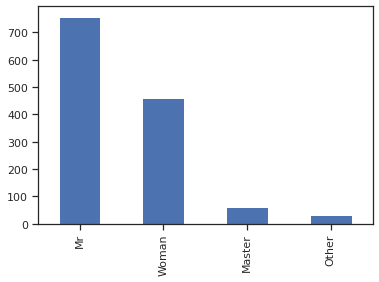

In [24]:
All['Title'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Title', ylabel='count'>

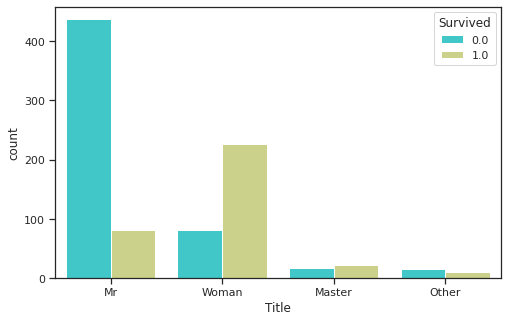

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x='Title',data=All.head(891), palette='rainbow',hue='Survived')

In [26]:
All

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,E10,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Woman
2,26.0,E10,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Woman
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Woman
4,35.0,E10,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,E10,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Other
1306,38.5,E10,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr
1307,NaN,E10,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr


In [27]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(train.loc[: , ['Age' ,'Pclass','Parch','Fare','SibSp' ]].values.astype('int'),
               train.loc[: , ['Age']].values.astype('int').reshape(-1, 1))
Feature2 = ['Age' ,'Pclass','Parch','Fare','SibSp' ]
Mutual_Information_table = pd.DataFrame(columns=['Feature1', 'Feature2', 'MIC'], index=range(5))
Mutual_Information_table['Feature1'] = 'Age'
for feature in range(5):
    Mutual_Information_table['Feature2'][feature] = Feature2[feature]
for value in range(5):
    Mutual_Information_table['MIC'][value] = mi_score[value]
Mutual_Information_table


,Feature1,Feature2,MIC
0,Age,Age,0.515733
1,Age,Pclass,0.211369
2,Age,Parch,0.231388
3,Age,Fare,0.151622
4,Age,SibSp,0.180101


In [28]:
age_by_pclass_sex = round(All.groupby(['Sex', 'Pclass']).median()['Age'])

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Mean age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Mean age of all passengers: {}'.format(round(All['Age'].mean())))

All['Age'] = All.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(round(x.median())))

Mean age of Pclass 1 females: 36.0
Mean age of Pclass 1 males: 42.0
Mean age of Pclass 2 females: 28.0
Mean age of Pclass 2 males: 30.0
Mean age of Pclass 3 females: 22.0
Mean age of Pclass 3 males: 25.0
Mean age of all passengers: 30.0


In [29]:
All_org = All.copy()

In [30]:
All

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,E10,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Woman
2,26.0,E10,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Woman
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Woman
4,35.0,E10,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,E10,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Other
1306,38.5,E10,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr
1307,25.0,E10,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr


In [31]:
All['Title'] = pd.factorize(All['Title'])[0]
All['Cabin'] = pd.factorize(All['Cabin'])[0]
All['Sex'] = pd.factorize(All['Sex'])[0]
All['Embarked'] = pd.factorize(All['Embarked'])[0]
All.drop(['Name', 'Parch', 'PassengerId','SibSp',  'Ticket'], axis=1, inplace=True)
All.head()


,Age,Cabin,Embarked,Fare,Pclass,Sex,Survived,Title
0,22.0,0,0,7.2500,3,0,0.0,0
1,38.0,1,1,71.2833,1,1,1.0,1
2,26.0,0,0,7.9250,3,1,1.0,1
3,35.0,2,0,53.1000,1,1,1.0,1
4,35.0,0,0,8.0500,3,0,0.0,0


In [32]:
corr = All.head(891).corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Cabin,Embarked,Fare,Pclass,Sex,Survived,Title
Age,1.000000,0.328112,-0.053976,0.123849,-0.417801,-0.101631,-0.058760,-0.157156
Cabin,0.328112,1.000000,0.025295,0.448953,-0.754860,0.087096,0.293468,0.167872
Embarked,-0.053976,0.025295,1.000000,0.062142,0.045702,0.116569,0.106811,0.092597
Fare,0.123849,0.448953,0.062142,1.000000,-0.549500,0.182333,0.257307,0.142569
Pclass,-0.417801,-0.754860,0.045702,-0.549500,1.000000,-0.131900,-0.338481,-0.171976
Sex,-0.101631,0.087096,0.116569,0.182333,-0.131900,1.000000,0.543351,0.529949
Survived,-0.058760,0.293468,0.106811,0.257307,-0.338481,0.543351,1.000000,0.409098
Title,-0.157156,0.167872,0.092597,0.142569,-0.171976,0.529949,0.409098,1.000000


In [33]:
All.drop(['Age', 'Embarked', 'Fare','Sex'], axis=1, inplace=True)
All.head()


,Cabin,Pclass,Survived,Title
0,0,3,0.0,0
1,1,1,1.0,1
2,0,3,1.0,1
3,2,1,1.0,1
4,0,3,0.0,0


In [34]:
All["Deck"]=All_org["Cabin"]
for i in range(All.shape[0]):
    All["Deck"][i] = All_org["Cabin"][i][0]
All.drop(['Cabin'], axis=1, inplace=True)
All.head()

,Pclass,Survived,Title,Deck
0,3,0.0,0,E
1,1,1.0,1,C
2,3,1.0,1,E
3,1,1.0,1,C
4,3,0.0,0,E


<AxesSubplot:>

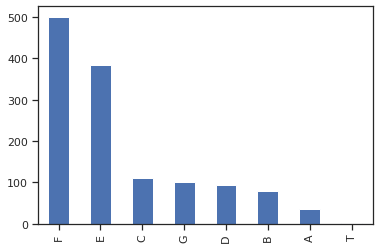

In [35]:
All['Deck'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Deck', ylabel='count'>

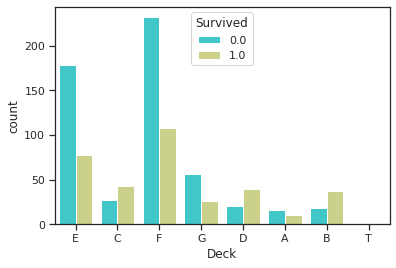

In [36]:
sns.countplot(x='Deck',data=All.head(891), palette='rainbow',hue='Survived')

In [37]:
All = pd.get_dummies(All, columns=['Pclass', 'Deck','Title'], prefix=['Pclass', 'Deck','Title'])
All.head()


,Survived,Pclass_1,Pclass_2,Pclass_3,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Title_0,Title_1,Title_2,Title_3
0,0.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,1.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,1.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [38]:
All.insert(16, "survived", All['Survived'])
All.drop(['Survived'], axis=1, inplace=True)
All.head()


,Pclass_1,Pclass_2,Pclass_3,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Title_0,Title_1,Title_2,Title_3,survived
0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0.0
1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1.0
2,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1.0
3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1.0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0.0


In [39]:
train = All.head(891)

X = train.values[:,:-1]
Y = train.values[:,-1]
label_encoded_y = LabelEncoder().fit_transform(Y)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

RF = RandomForestClassifier(max_depth=5, max_leaf_nodes= 8, n_estimators= 175)

results = cross_val_score(RF, X, label_encoded_y, cv=kfold)
print(results.mean() ,results.std() )

0.8001622971285892 0.037435370295733614


In [40]:
test = All.tail(418)
test.drop(['survived'], axis=1, inplace=True)
RF.fit(X, label_encoded_y)

Submission = pd.DataFrame({'PassengerId':list(range(892,1310))})
Submission['Survived']=RF.predict(test)
Submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
Submission.to_csv('submission.csv', index=False)